## Objetivo - Bussiness Understanding

Modelo para recomendar cultivos con base en las temperaturas, lluvias y más datos del lugar en el que se quiere plantar.

## Data understanding

In [6]:
import kagglehub
import pandas as pd
import os

# Descargar dataset
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")
print("Path to dataset files:", path)

# Ver los archivos disponibles en la carpeta descargada
print(os.listdir(path))

# Cargar el CSV en pandas
csv_file = os.path.join(path, "Crop_recommendation.csv")
df = pd.read_csv(csv_file)

# Mostrar las primeras filas
df.head()

Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
Path to dataset files: /kaggle/input/crop-recommendation-dataset
['Crop_recommendation.csv']


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Distribución de variables númericas

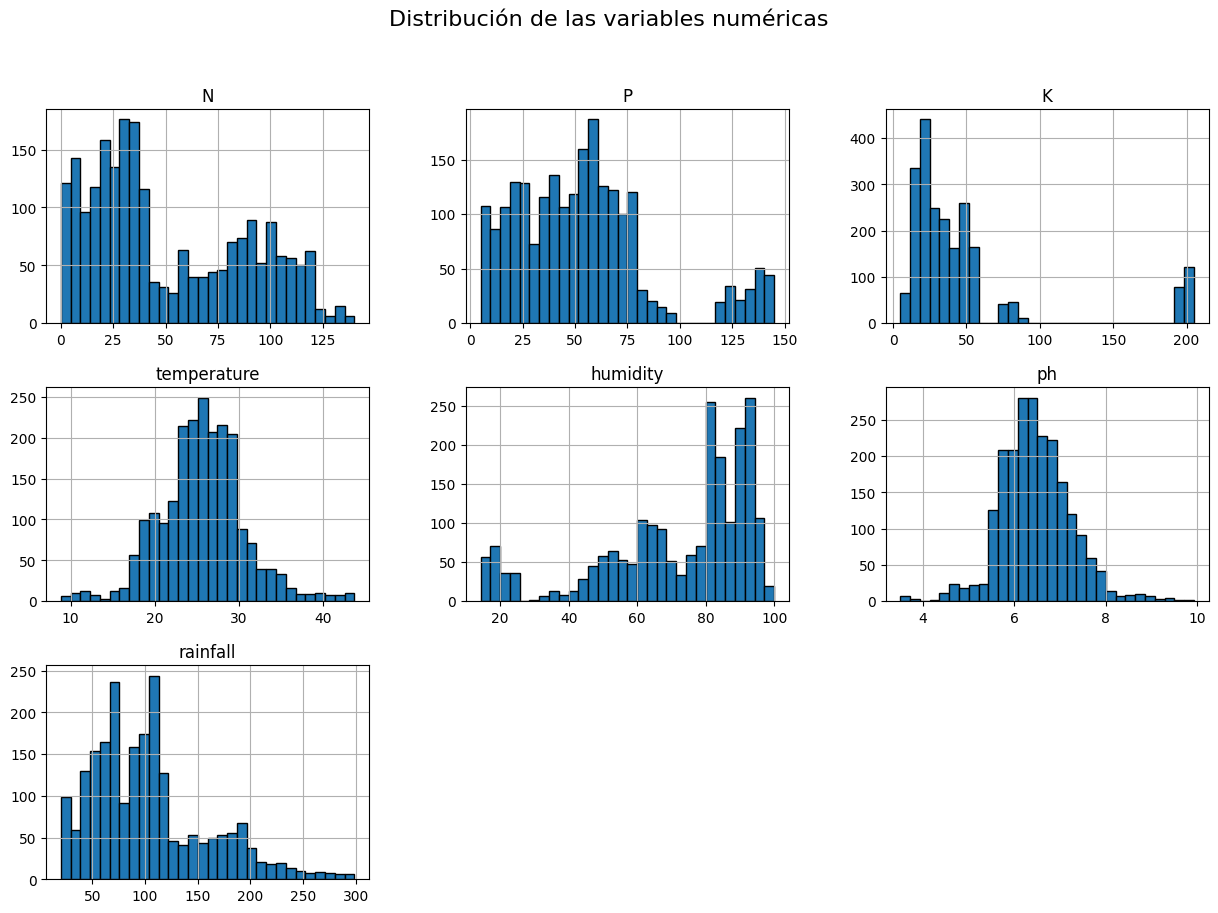

In [9]:
import matplotlib.pyplot as plt

# Histogramas para cada columna numérica
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

### Boxplots para detectar outliers

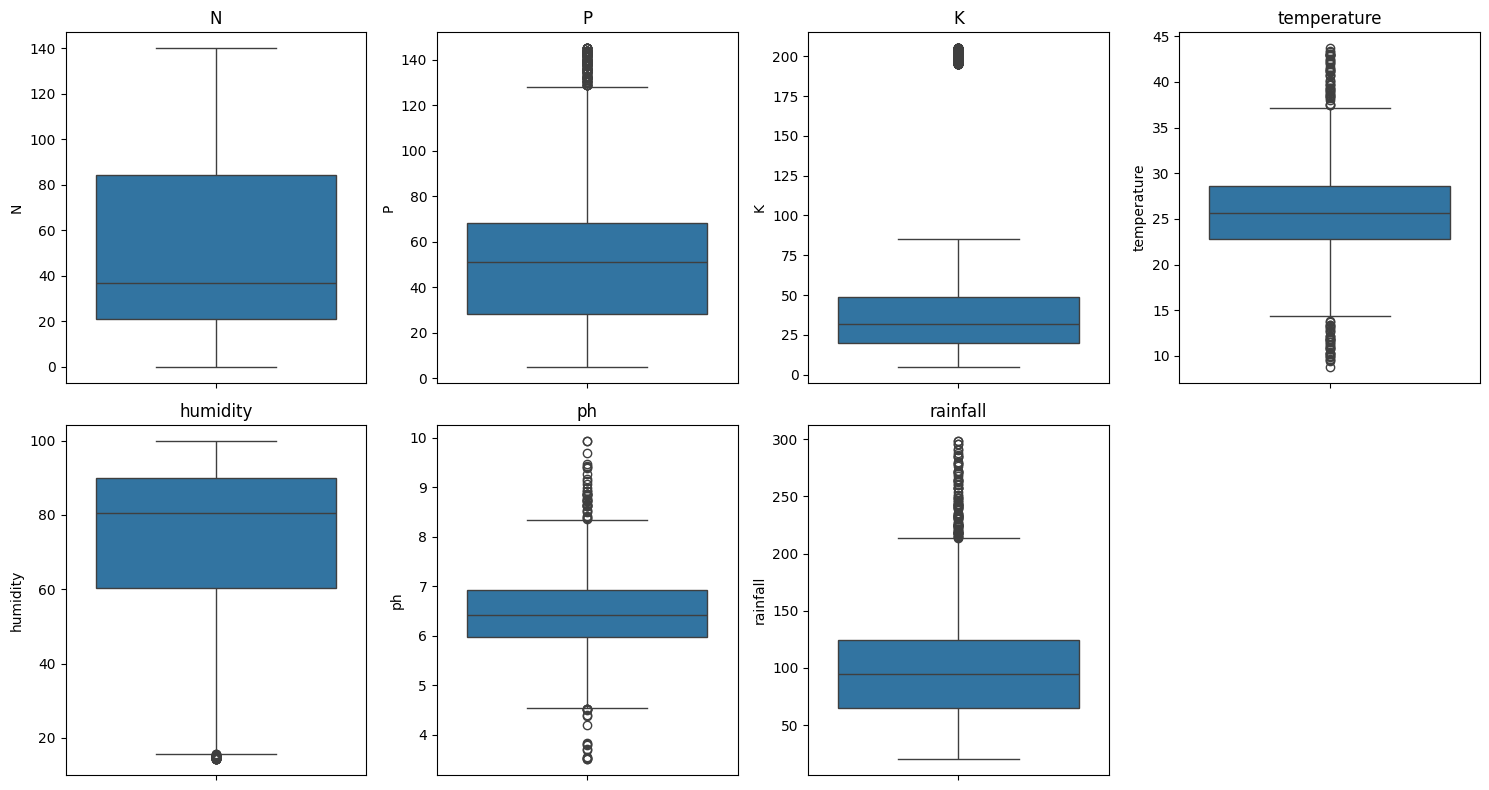

In [10]:
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Gráfico 3D

/tmp/ipython-input-2395780160.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(labels))


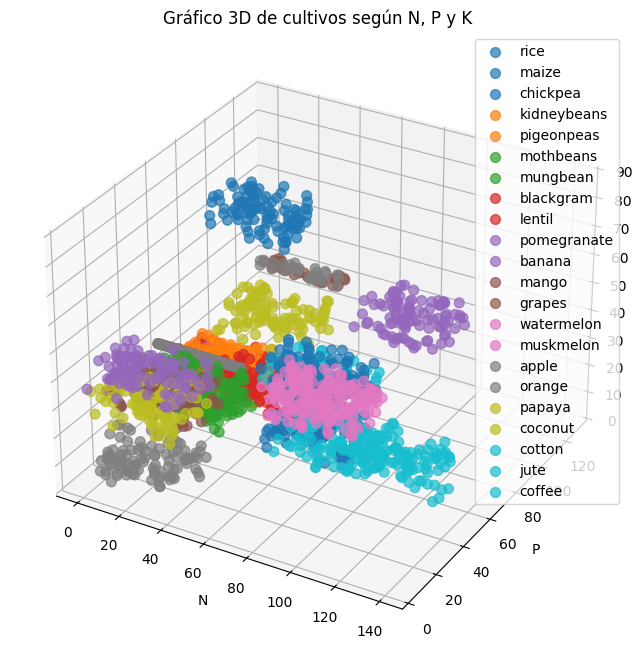

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Selecciona las variables para el eje x, y, z
x_col = "N"
y_col = "P"
z_col = "K"

# Crear figura 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores distintos según la clase
labels = df["label"].unique()
colors = plt.cm.get_cmap("tab10", len(labels))

for i, label in enumerate(labels):
    subset = df[df["label"] == label]
    ax.scatter(subset[x_col], subset[y_col], subset[z_col],
               label=label, s=50, alpha=0.7, color=colors(i))

# Etiquetas de los ejes
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title("Gráfico 3D de cultivos según N, P y K")

# Leyenda
ax.legend()
plt.show(

### Balanceo de clases

/tmp/ipython-input-3893406899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="Set2")


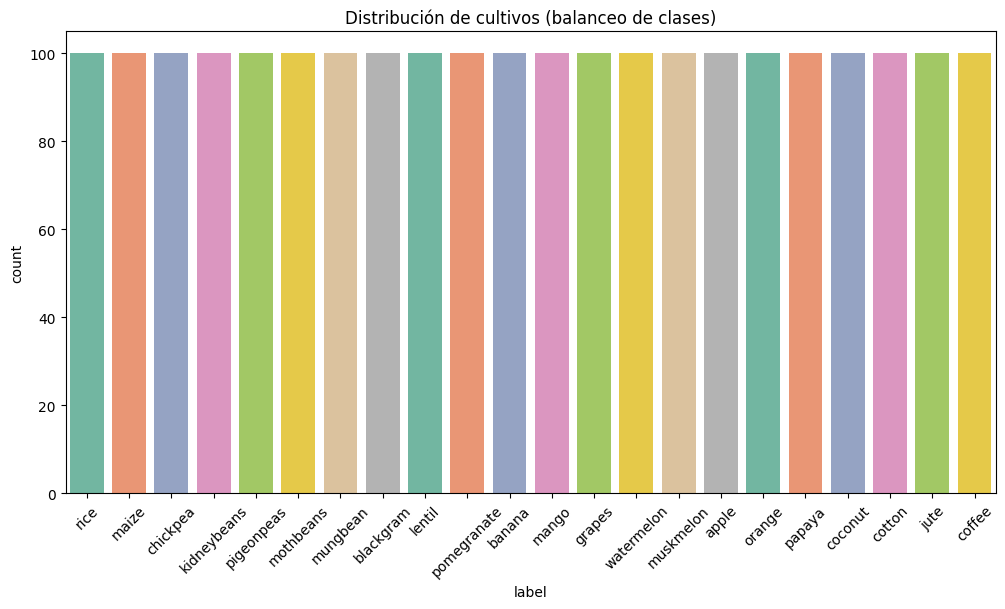

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribución de cultivos (balanceo de clases)")
plt.show()

### Correlación de variables

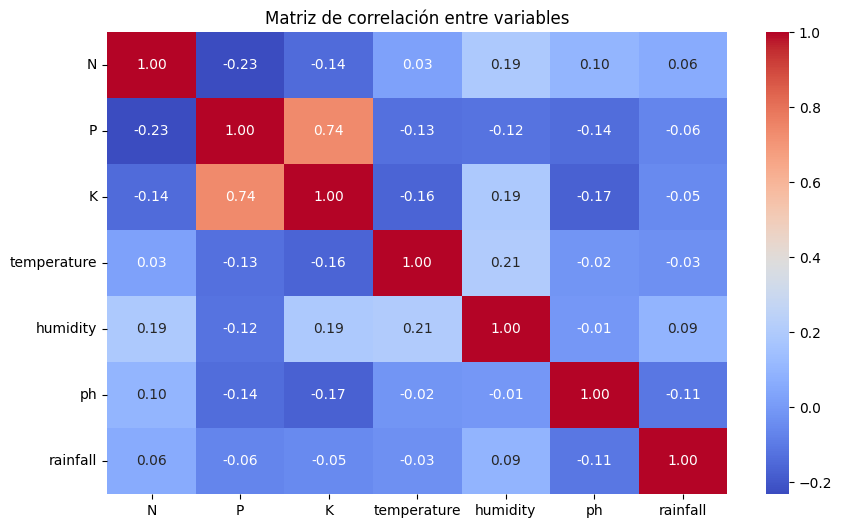

In [14]:
plt.figure(figsize=(10,6))
df_corr = df.drop(columns=['label'])
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

### Outliers con IQR

In [20]:
# Detección de outliers con IQR
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Ejemplo con 'rainfall'
outliers_rainfall = detectar_outliers('rainfall')
outliers_temperature = detectar_outliers('temperature')
outliers_p = detectar_outliers('P')
outliers_k = detectar_outliers('K')
outliers_n = detectar_outliers('N')
outliers_ph = detectar_outliers('ph')
outliers_humidity = detectar_outliers('humidity')
print(f"Outliers en rainfall: {len(outliers_rainfall)}")
print(f"Outliers en temperature: {len(outliers_temperature)}")
print(f"Outliers en p: {len(outliers_p)}")
print(f"Outliers en k: {len(outliers_k)}")
print(f"Outliers en ph: {len(outliers_ph)}")
print(f"Outliers en humidity: {len(outliers_humidity)}")

Outliers en rainfall: 100
Outliers en temperature: 86
Outliers en p: 138
Outliers en k: 200
Outliers en ph: 57
Outliers en humidity: 30


In [17]:
outliers_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 1894
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            100 non-null    int64  
 1   P            100 non-null    int64  
 2   K            100 non-null    int64  
 3   temperature  100 non-null    float64
 4   humidity     100 non-null    float64
 5   ph           100 non-null    float64
 6   rainfall     100 non-null    float64
 7   label        100 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 7.0+ KB


## Data preparation

Remplazar los outliers con la media

In [19]:
import numpy as np

def replace_outliers_iqr(df, columns=None, method="median"):
    """
    Reemplaza outliers usando el método IQR en varias columnas.

    Parámetros:
        df (pd.DataFrame): DataFrame a procesar.
        columns (list): Lista de columnas a tratar. Si es None, se usan todas las numéricas.
        method (str): "median" o "mean" para reemplazar los outliers.

    Retorna:
        df (pd.DataFrame): DataFrame con outliers reemplazados.
    """
    # Si no se pasan columnas, tomar todas las numéricas
    if columns is None:
        columns = df.select_dtypes(include=['float64','int64']).columns

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if method == "median":
            value = df[col].median()
        else:
            value = df[col].mean()

        df[col] = np.where((df[col] < lower) | (df[col] > upper), value, df[col])

    return df

In [22]:
# Reemplazar solo en ciertas columnas con la media
df_clean = replace_outliers_iqr(df, columns=["rainfall","temperature", "P", "K", "N", "humidity"], method="median")

Volver a comprobar los outliers en el dataset

In [24]:
# Detección de outliers con IQR
def detectar_outliers(col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    return outliers

# Ejemplo con 'rainfall'
outliers_rainfall = detectar_outliers('rainfall')
outliers_temperature = detectar_outliers('temperature')
outliers_p = detectar_outliers('P')
outliers_k = detectar_outliers('K')
outliers_n = detectar_outliers('N')
outliers_ph = detectar_outliers('ph')
outliers_humidity = detectar_outliers('humidity')
print(f"Outliers en rainfall: {len(outliers_rainfall)}")
print(f"Outliers en temperature: {len(outliers_temperature)}")
print(f"Outliers en p: {len(outliers_p)}")
print(f"Outliers en k: {len(outliers_k)}")
print(f"Outliers en ph: {len(outliers_ph)}")
print(f"Outliers en humidity: {len(outliers_humidity)}")

Outliers en rainfall: 85
Outliers en temperature: 10
Outliers en p: 62
Outliers en k: 44
Outliers en ph: 57
Outliers en humidity: 41


### Preparar los datos pra el entrenamiento del modelo

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# =====================
# 1. Separar features y target
# =====================
X = df_clean.drop(columns=["label"])
y = df_clean["label"]

In [28]:
# =====================
# 2. Dividir en entrenamiento y prueba
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Escalado de los datos

In [29]:
# =====================
# 3. Escalado de datos (importante para SVM y KNN)
# =====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# =====================
# 4. Definir modelos
# =====================
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

## Modeling

In [32]:
# =====================
# 5. Entrenar y evaluar
# =====================
resultados = []

for nombre, modelo in modelos.items():
    if nombre in ["SVM", "KNN", "Logistic Regression"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    resultados.append([nombre, acc, prec, rec, f1])

## Evaluation

In [33]:
# =====================
# 6. Mostrar resultados en tabla
# =====================
resultados_df = pd.DataFrame(resultados, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score"])
print(resultados_df)

                Modelo  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.979545   0.979870  0.979545  0.979541
1        Random Forest  0.995455   0.995671  0.995455  0.995452
2                  SVM  0.986364   0.986982  0.986364  0.986347
3                  KNN  0.977273   0.977988  0.977273  0.977067
4    Gradient Boosting  0.986364   0.987179  0.986364  0.986404


In [34]:

# =====================
# 7. Reporte detallado de clasificación del mejor modelo
# =====================
mejor_modelo = resultados_df.sort_values(by="F1-score", ascending=False).iloc[0]["Modelo"]
print(f"\n📊 Mejor modelo: {mejor_modelo}\n")
modelo_seleccionado = modelos[mejor_modelo]
if mejor_modelo in ["SVM", "KNN", "Logistic Regression"]:
    y_pred = modelo_seleccionado.predict(X_test_scaled)
else:
    y_pred = modelo_seleccionado.predict(X_test)
print(classification_report(y_test, y_pred))


📊 Mejor modelo: Random Forest

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00      

Comparar métricas de entrenamiento y prueba

In [35]:
for nombre, modelo in modelos.items():
    if nombre in ["SVM", "KNN", "Logistic Regression"]:
        y_pred_train = modelo.predict(X_train_scaled)
        y_pred_test = modelo.predict(X_test_scaled)
    else:
        y_pred_train = modelo.predict(X_train)
        y_pred_test = modelo.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"{nombre}: Train Acc={acc_train:.4f}, Test Acc={acc_test:.4f}, Diferencia={acc_train - acc_test:.4f}")

Logistic Regression: Train Acc=0.9756, Test Acc=0.9795, Diferencia=-0.0040
Random Forest: Train Acc=1.0000, Test Acc=0.9955, Diferencia=0.0045
SVM: Train Acc=0.9847, Test Acc=0.9864, Diferencia=-0.0017
KNN: Train Acc=0.9790, Test Acc=0.9773, Diferencia=0.0017
Gradient Boosting: Train Acc=1.0000, Test Acc=0.9864, Diferencia=0.0136


In [36]:
from sklearn.model_selection import cross_val_score

for nombre, modelo in modelos.items():
    if nombre in ["SVM", "KNN", "Logistic Regression"]:
        scores = cross_val_score(modelo, X, y, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(modelo, X, y, cv=5, scoring="accuracy")
    print(f"{nombre}: CV mean={scores.mean():.4f}, std={scores.std():.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: CV mean=0.9618, std=0.0083
Random Forest: CV mean=0.9932, std=0.0048
SVM: CV mean=0.9664, std=0.0056
KNN: CV mean=0.9786, std=0.0037
Gradient Boosting: CV mean=0.9905, std=0.0053


### Curvas de aprendizaje

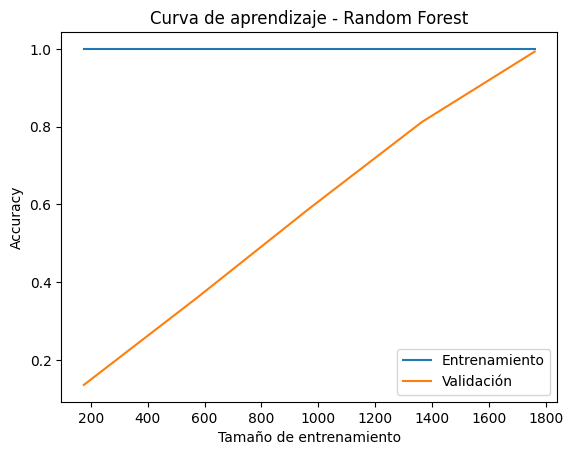

In [37]:
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import numpy as np

modelo = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    modelo, X, y, cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Entrenamiento")
plt.plot(train_sizes, test_mean, label="Validación")
plt.xlabel("Tamaño de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de aprendizaje - Random Forest")
plt.show()